# Loading Directories

In [1]:
test_invoices = "./Test Invoices Folder/PDF Invoices/"
im_path = "./Invoice Images/"


# Converting PDFs to Images

In [2]:
import os
from pdf2image import convert_from_path
from PIL import Image


files = os.listdir(test_invoices)
# print("Files found are: ", files)

def pdf_toImage(file_name):
    # print("File processed is: ", file_name)
    if(file_name.endswith('.pdf')):
        # print("PDF File Found..")
        pages = convert_from_path(file_name)

        for i in range(len(pages)):
            pages[i].save(im_path+(file_name.split('/')[-1]).split('.')[0]+' page' + str(i) + '.png', 'PNG')
            #converting to grey-scale
            img = Image.open(im_path + file_name.split('/')[-1].split('.')[0]+' page' + str(i) + '.png').convert('LA')
            img.save(im_path + file_name.split('/')[-1].split('.')[0]+' page' + str(i) + '.png')
            img = img.resize((1700, 1800), Image.ANTIALIAS)
            img.save(im_path + file_name.split('/')[-1].split('.')[0]+' page' + str(i) + '.png')
    else:
        print("Image File Found..")


pdf_toImage(test_invoices+files[0])


# Plotting First Image Created

Looking for C:\Users\ahsan\.keras-ocr\craft_mlt_25k.h5
Looking for C:\Users\ahsan\.keras-ocr\crnn_kurapan.h5


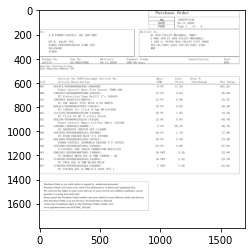

In [3]:
import keras_ocr
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pipeline = keras_ocr.pipeline.Pipeline()

im_files_list = os.listdir(im_path)
img = mpimg.imread(im_path + im_files_list[0])
imgplot = plt.imshow(img)
plt.show()


In [4]:
import pandas as pd


def tuples_toCSV(b_prediction):
    Object = []
    xmin = []
    xmax = []
    ymin = []
    ymax = []
    dataframes = []

    for i in range(len(b_prediction)):
        df = pd.DataFrame()
        SmallList_OBJECT = []
        SmallList_XMIN = []
        SmallList_XMAX = []
        SmallList_YMIN = []
        SmallList_YMAX = []
        FILE = b_prediction[i]
        for j in range(len(FILE)):
            SmallList_OBJECT.append(b_prediction[i][j][0])
            SmallList_XMIN.append(b_prediction[i][j][1][1][0])
            SmallList_YMIN.append(b_prediction[i][j][1][1][1])
            SmallList_XMAX.append(b_prediction[i][j][1][2][0])
            SmallList_YMAX.append(b_prediction[i][j][1][2][1])

        Object.append(SmallList_OBJECT)
        xmin.append(SmallList_XMIN)
        xmax.append(SmallList_XMAX)
        ymin.append(SmallList_YMIN)
        ymax.append(SmallList_YMAX)

        df['xmin'] = SmallList_XMIN
        df['xmax'] = SmallList_XMAX
        df['ymin'] = SmallList_YMIN
        df['ymax'] = SmallList_YMAX
        df['Object'] = SmallList_OBJECT
        dataframes.append(df)

    return dataframes


In [5]:
import numpy as np
image_dir = im_path

def batchData_Tuple(ImagePath):
    f_names = []
    custom_images = []
    for filename in os.listdir(ImagePath):
        f_names.append(filename)
        custom_images.append(os.path.join(ImagePath, filename))

    images = [keras_ocr.tools.read(path) for path in custom_images]
    t_images = len(images)
    print("Total Images are: ", t_images)
    image_batches = []
    batch_start = 0
    batch_end = 3
    if(t_images > 1):
        while(batch_start < t_images):
            batch = []
            batch = images[batch_start:batch_end]
            batch_start = batch_end
            batch_end = batch_start + 3
            image_batches.append(batch)
        batch = images[batch_start:]
    else:
        image_batches.append(images[0])
    print(image_batches)
    return f_names, image_batches


file_names = batchData_Tuple(image_dir)[0]
image_batches = batchData_Tuple(image_dir)[1]


print("File names are: ", file_names)
t_batches = len(image_batches)
print("Total batches are: ", t_batches)


def batch_toDataframe(batches_array):
    dataframes = []
    for i in range(len(batches_array)):
        im_batch = batches_array[i]
        prediction = pipeline.recognize(im_batch)
        df_batch = tuples_toCSV(prediction)
        dataframes.append(df_batch)
        
    return dataframes


df_batches = batch_toDataframe(image_batches)
print(df_batches)


Total Images are:  5
[[array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
 

In [ ]:
df = 0
xMIN, xMAX = [], []
yMIN, yMAX = [], []
Text = []


def findRight(df, df_ind, xMIN, xMAX, yMIN, yMAX):
    S_list = []
    xmax = xMAX[df_ind]
    ymin = yMIN[df_ind]
    ymax = yMAX[df_ind]

    for i in range(len(df)):
        if(xMIN[i] > xmax):
            if not (yMIN[i] > ymax or yMAX[i] < ymin):
                if(yMIN[i] <= ymin and yMAX[i] <= ymax):
                    S_list.append(i)
                elif (yMIN[i] <= ymin and yMAX[i] >= ymax):
                    S_list.append(i)
                elif (yMIN[i] >= ymin and yMAX[i] <= ymax):
                    S_list.append(i)
                elif (yMIN[i] >= ymin and yMAX[i] >= ymax):
                    S_list.append(i)
                elif (yMIN[i] == ymin and yMAX[i] == ymax):
                    S_list.append(i)

    # print(S_list)
    if S_list:
        consec = S_list[0]
        for j in S_list:
            if(xMIN[consec] > xMIN[j]):
                consec = j
        return consec

    return -1


def findLeft(df, df_ind, xMIN, xMAX, yMIN, yMAX):
    S_list = []
    xmin = xMIN[df_ind]
    ymin = yMIN[df_ind]
    ymax = yMAX[df_ind]

    for i in range(len(df)):
        if(xMAX[i] < xmin):
            if not (yMIN[i] > ymax or yMAX[i] < ymin):
                if(yMIN[i] <= ymin and yMAX[i] <= ymax):
                    S_list.append(i)
                elif (yMIN[i] <= ymin and yMAX[i] >= ymax):
                    S_list.append(i)
                elif (yMIN[i] >= ymin and yMAX[i] <= ymax):
                    S_list.append(i)
                elif (yMIN[i] >= ymin and yMAX[i] >= ymax):
                    S_list.append(i)
                elif (yMIN[i] == ymin and yMAX[i] == ymax):
                    S_list.append(i)
    # print(S_list)
    if S_list:
        consec = S_list[0]
        for j in S_list:
            if(xMAX[j] > xMAX[consec]):
                consec = j
        return consec
    return -1


def findUp(df, df_ind, xMIN, xMAX, yMIN, yMAX):
    S_list = []
    xmin = xMIN[df_ind]
    xmax = xMAX[df_ind]
    ymin = yMIN[df_ind]

    for i in range(len(df)):
        if(yMAX[i] < ymin):
            if not (xMAX[i] < xmin or xMIN[i] > xmax):
                if(xMIN[i] <= xmin and xMAX[i] <= xmax):
                    S_list.append(i)
                elif (xMIN[i] <= xmin and xMAX[i] >= xmax):
                    S_list.append(i)
                elif (xMIN[i] >= xmin and xMAX[i] <= xmax):
                    S_list.append(i)
                elif (xMIN[i] >= xmin and xMAX[i] >= xmax):
                    S_list.append(i)
                elif (xMIN[i] == xmin and xMAX[i] == xmax):
                    S_list.append(i)
    # print(S_list)

    if S_list:
        consec = S_list[0]
        for j in S_list:
            if(yMAX[j] > yMAX[consec]):
                consec = j
        return consec

    return -1


def findDown(df, df_ind, xMIN, xMAX, yMIN, yMAX):
    S_list = []
    xmin = xMIN[df_ind]
    xmax = xMAX[df_ind]
    ymax = yMAX[df_ind]

    for i in range(len(df)):
        if(yMIN[i] > ymax):
            if not (xMAX[i] < xmin or xMIN[i] > xmax):
                if(xMIN[i] <= xmin and xMAX[i] <= xmax):
                    S_list.append(i)
                elif (xMIN[i] <= xmin and xMAX[i] >= xmax):
                    S_list.append(i)
                elif (xMIN[i] >= xmin and xMAX[i] <= xmax):
                    S_list.append(i)
                elif (xMIN[i] >= xmin and xMAX[i] >= xmax):
                    S_list.append(i)
                elif (xMIN[i] == xmin and xMAX[i] == xmax):
                    S_list.append(i)
    # print(S_list)
    if S_list:
        consec = S_list[0]
        for j in S_list:
            if(yMIN[j] < yMIN[consec]):
                consec = j
        return consec

    return -1


def makeGraph(df):
    G = nx.Graph()
    xMIN = df['xmin']
    xMAX = df['xmax']
    yMIN = df['ymin']
    yMAX = df['ymax']
    Text = df['Object']

    for i in range(len(df)):
        if findUp(df, i, xMIN, xMAX, yMIN, yMAX):
            l = findUp(df, i, xMIN, xMAX, yMIN, yMAX)
            if(l != -1):
                text = Text[l]
                G.add_edge(Text[i], text)
        if findRight(df, i, xMIN, xMAX, yMIN, yMAX):
            l = findRight(df, i, xMIN, xMAX, yMIN, yMAX)
            if (l != -1):
                text = Text[l]
                G.add_edge(Text[i], text)
        if findDown(df, i, xMIN, xMAX, yMIN, yMAX):
            l = findDown(df, i, xMIN, xMAX, yMIN, yMAX)
            if (l != -1):
                text = Text[l]
                G.add_edge(Text[i], text)
        if findLeft(df, i, xMIN, xMAX, yMIN, yMAX):
            l = findLeft(df, i, xMIN, xMAX, yMIN, yMAX)
            if (l != -1):
                text = Text[l]
                G.add_edge(Text[i], text)
    return G

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np


def df_AdjMatrix(df_array):
    matrices = []
    for i in range(len(df_array)):
        G = makeGraph(df_array[i])
        M = nx.to_numpy_array(G, dtype=np.int32)
        matrices.append(M)

    return matrices


matrices = df_AdjMatrix(df_batches)
print("Total matrices are: ", len(matrices))


C:\Users\ahsan\anaconda3\envs\Graphs\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ahsan\anaconda3\envs\Graphs\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\ahsan\anaconda3\envs\Graphs\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


ImportError: cannot import name 'Grapher' from 'Mat_Package.Grapher' (d:\Ahsan\Project Work\Mat_Package\Grapher.py)